In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import random

In [2]:
WB = 0.365
MAX_LINEAR_SPEED = 25
MAX_STEER_ANGLE = 1.57

In [3]:
class PathFinderController:
    def __init__(self, Kp_rho, Kp_alpha, Kp_beta):
        self.Kp_rho = Kp_rho
        self.Kp_alpha = Kp_alpha
        self.Kp_beta = Kp_beta
        
    def calc_control_command(self, x_diff, y_diff, theta, theta_goal):
        rho = np.hypot(x_diff, y_diff)
        alpha = (np.arctan2(y_diff, x_diff)
                 - theta + np.pi) % (2 * np.pi) - np.pi
        beta = (theta_goal - theta - alpha + np.pi) % (2 * np.pi) - np.pi
        v = self.Kp_rho * rho
        w = self.Kp_alpha * alpha - controller.Kp_beta * beta
        steer_angle = math.atan(w*WB/v)
        if alpha > np.pi / 2 or alpha < -np.pi / 2:
            v = -v
        

        return rho, v, steer_angle
        
    

In [4]:
def transformation_matrix(x, y, theta):
        return np.array([
            [np.cos(theta), -np.sin(theta), x],
            [np.sin(theta), np.cos(theta), y],
            [0, 0, 1]
        ])

In [42]:
traj_x = []
traj_y = []
def move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal):
        x = x_start
        y = y_start
        theta = theta_start

        x_diff = x_goal - x
        y_diff = y_goal - y

        x_traj, y_traj = [], [] # For Plots

        rho = np.hypot(x_diff, y_diff)
        while rho > 0.000001:
            x_traj.append(x)
            y_traj.append(y)

            x_diff = x_goal - x
            y_diff = y_goal - y

            rho, v, steer_angle = controller.calc_control_command(
                x_diff, y_diff, theta, theta_goal)

            if abs(v) > MAX_LINEAR_SPEED:
                v = np.sign(v) * MAX_LINEAR_SPEED

#             if abs(steer_angle) > MAX_STEER_ANGLE:
#                 steer_angle = np.sign(steer_angle) * MAX_STEER_ANGLE
            
            theta = theta + (v*math.tan(steer_angle) / WB) * dt # YAW from BNO055
            x = x + v * np.cos(theta) * dt # X Co-ordinate from BNO055
            y = y + v * np.sin(theta) * dt # Y Co-ordinate from BNO055
            traj_x.append(x)
            traj_y.append(y)
            print(steer_angle)

            if show_animation:  # pragma: no cover
                plt.cla()
                plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
                plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
                plot_vehicle(x, y, theta, x_traj, y_traj)

In [43]:
def plot_vehicle(x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')

    plt.plot(x_traj, y_traj, 'b--')

    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect(
        'key_release_event',
        lambda event: [exit(0) if event.key == 'escape' else None])

    plt.xlim(-3, 7)
    plt.ylim(0, 10)
#     plt.gca().invert_yaxis()
    plt.pause(dt)

In [44]:
controller = PathFinderController(10, 20, 5)
dt = 0.01

# Robot specifications
MAX_LINEAR_SPEED = 15
MAX_ANGULAR_SPEED = 7

show_animation = True

In [50]:
def main():
    x_start = 0.81
    y_start = 5.117
    theta_start = math.pi
    x_goal = 1.801
    y_goal = 4.754
    theta_goal = math.pi
    print("Initial x: %.2f m\nInitial y: %.2f m\nInitial theta: %.2f rad\n" %
        (x_start, y_start, theta_start))
    print("Goal x: %.2f m\nGoal y: %.2f m\nGoal theta: %.2f rad\n" %
        (x_goal, y_goal, theta_goal))
    move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal)

Initial x: 0.81 m
Initial y: 5.12 m
Initial theta: 3.14 rad

Goal x: 1.80 m
Goal y: 4.75 m
Goal theta: 3.14 rad

1.1778707318027806


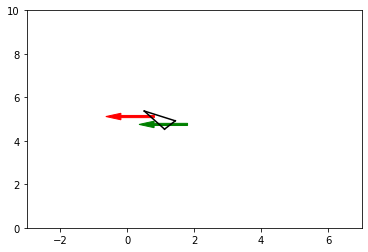

-1.0020814919970855


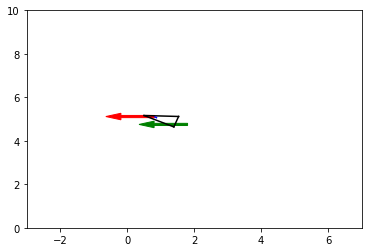

1.2711854950302983


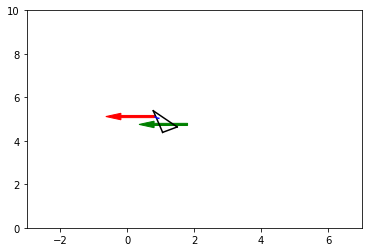

-0.9736238740188147


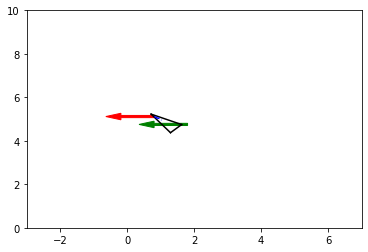

-1.0796342401040047


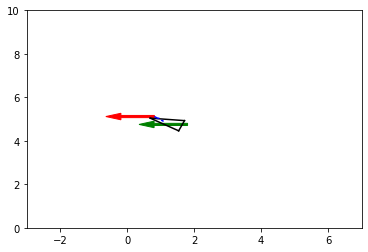

-1.185241301156332


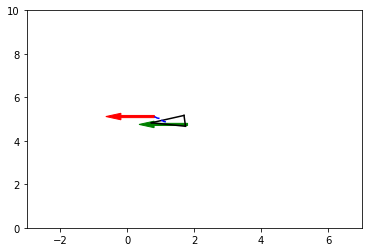

1.3473517325371762


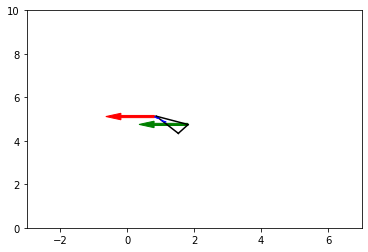

-1.203684078673628


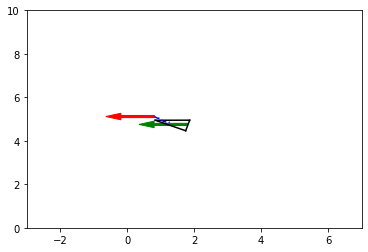

-1.2885419805409777


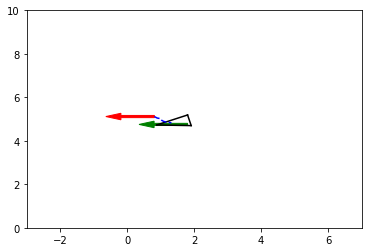

1.3982859395987262


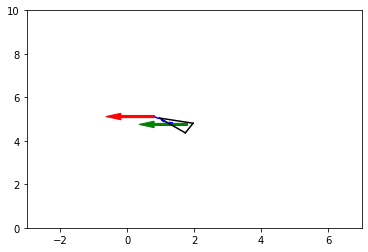

-1.3128899684626796


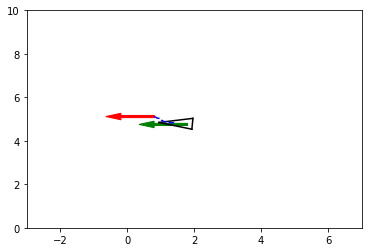

1.4410776186541365


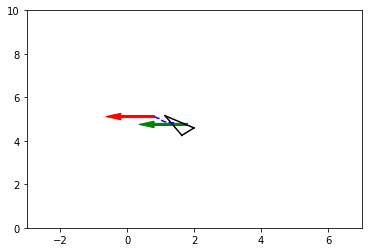

-1.3043068108681415


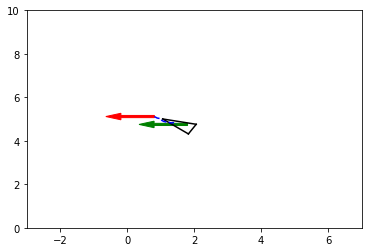

-1.3618781761436007


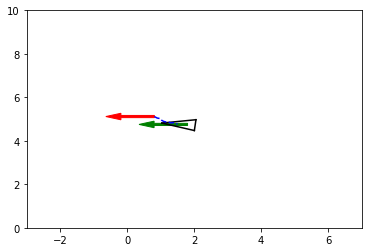

-1.4127792116446238


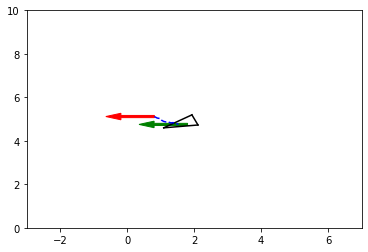

1.4724345425015608


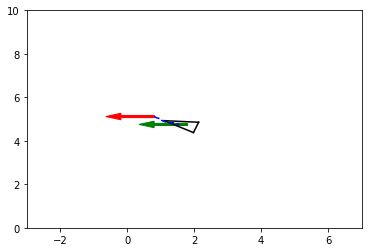

-1.4292199128145016


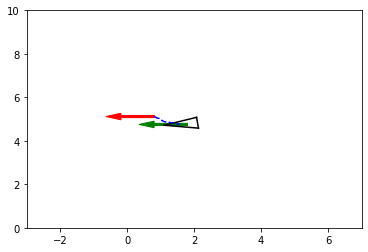

1.4962559390996375


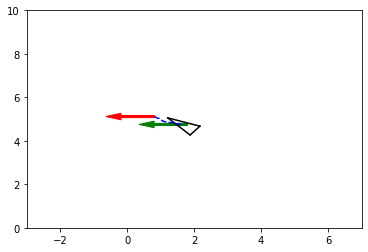

-1.4310779049831757


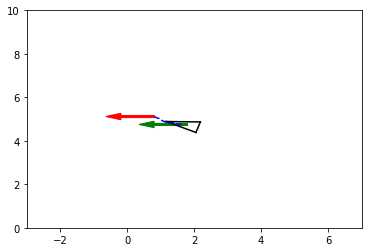

-1.4639169701212102


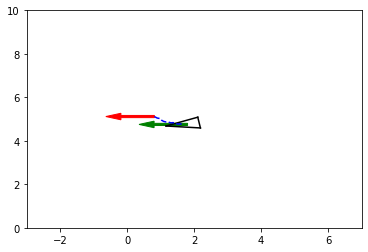

1.515679069250667


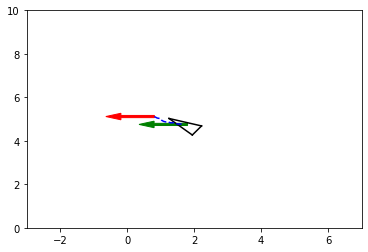

-1.5143862827089496


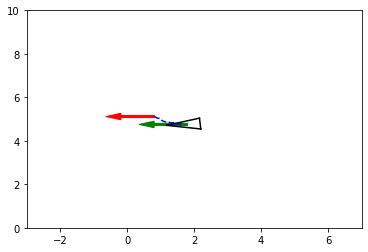

1.4969430210158767


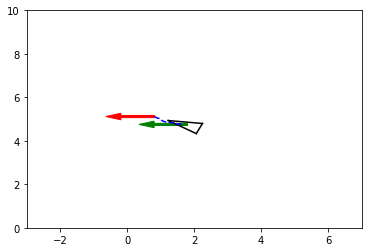

-1.526855053391897


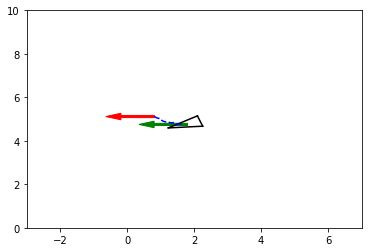

1.503453396396576


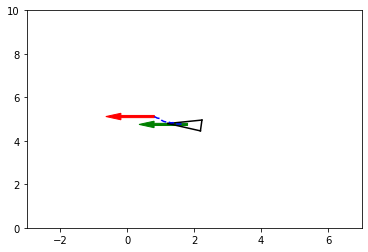

-1.5379157375723678


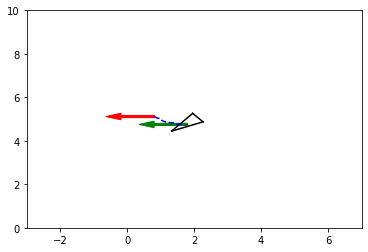

1.5349688100153227


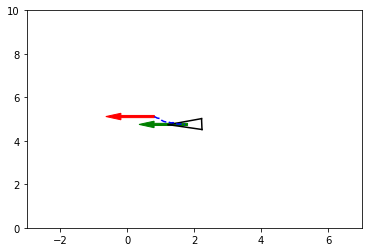

1.5438544002923191


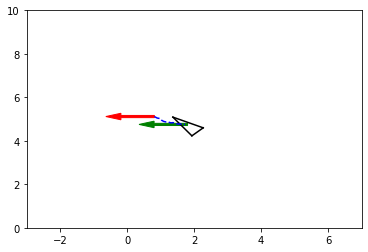

-1.5403236574804515


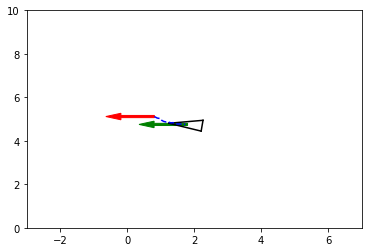

-1.547792509603541


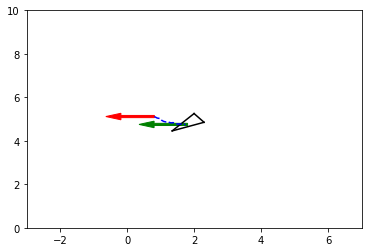

1.5464594234659736


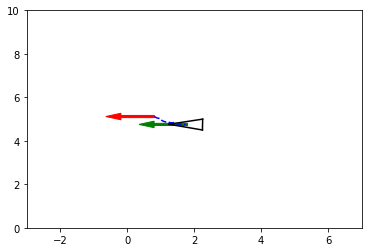

1.5525396866724919


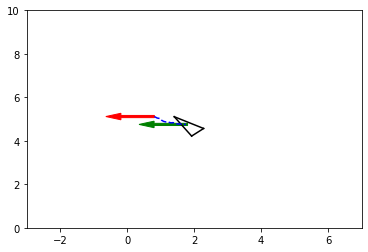

-1.5490016927363728


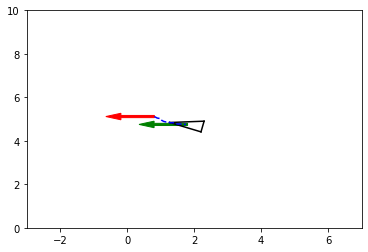

-1.5542390724375035


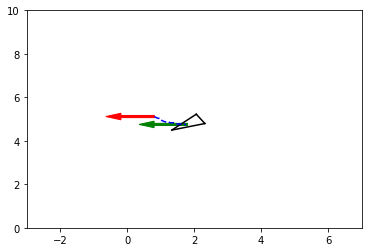

1.541309080425493


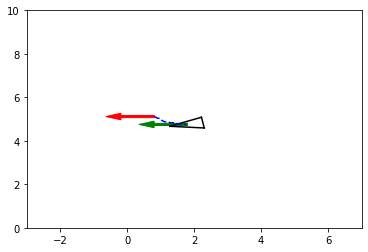

1.548469733718119


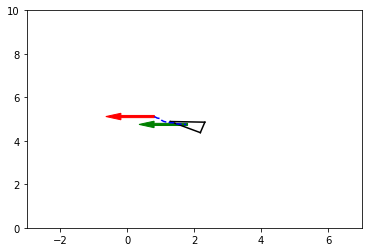

-1.558328061984812


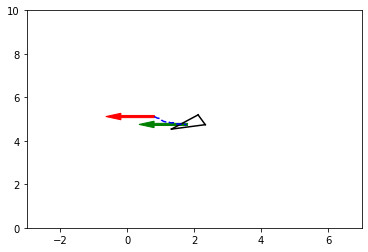

1.549715151220898


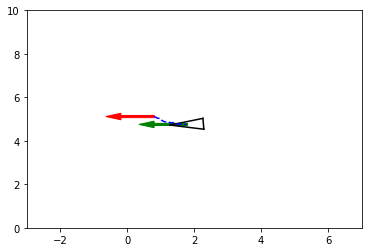

1.5549375300759716


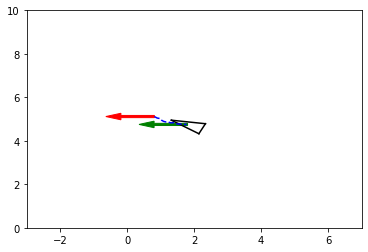

-1.561194298084969


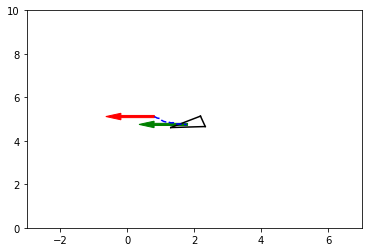

1.5564734148086492


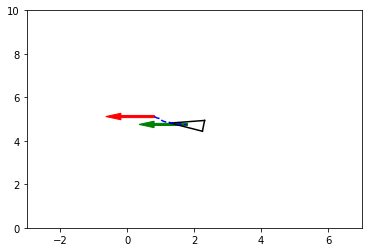

-1.5635741939884078


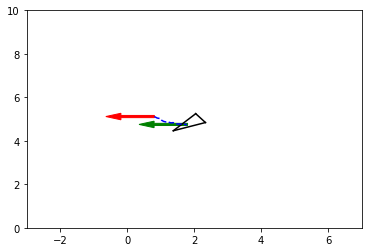

1.5632309096846795


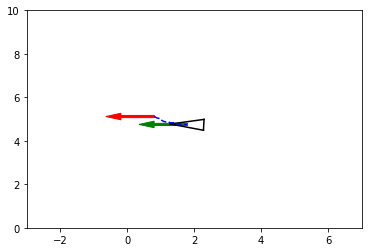

-1.5612459349630607


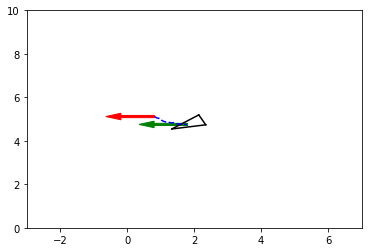

1.5648325631847257


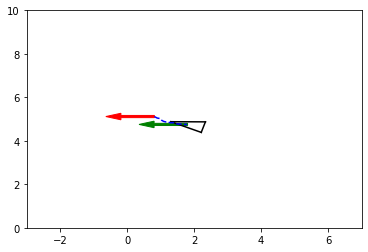

-1.5622921590095125


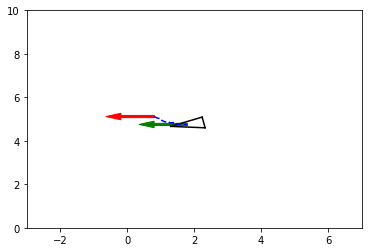

1.5662665229850856


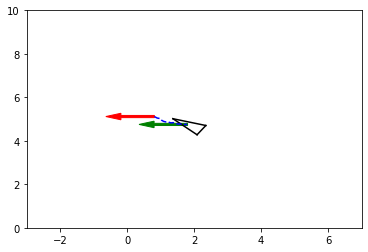

-1.562512620993011


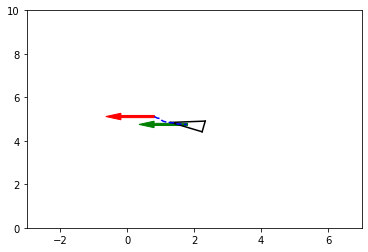

-1.5671480446582717


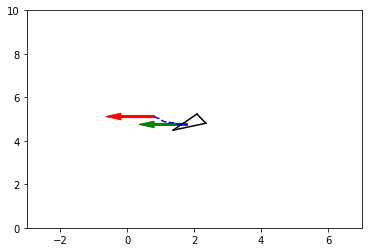

1.5669985025881223


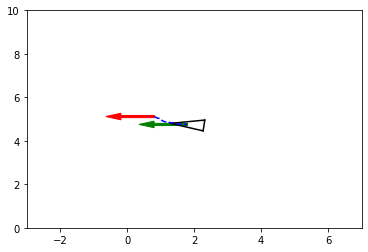

-1.5659538204566157


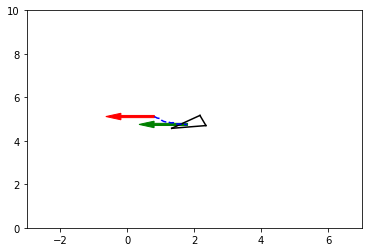

1.56781634203382


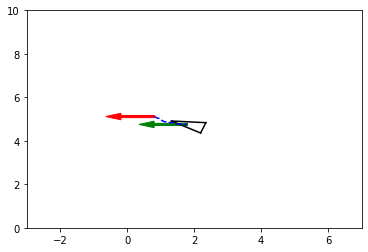

-1.5664524633873709


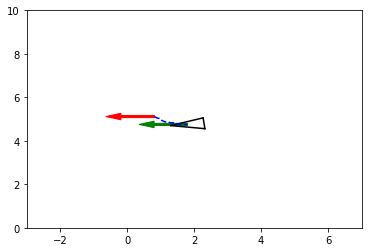

1.5685455697059416


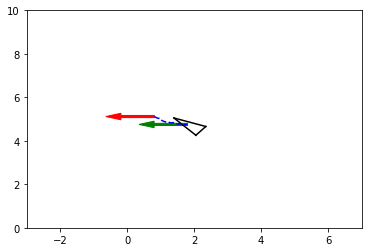

-1.5664768096331312


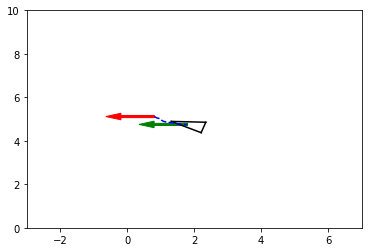

-1.567492675495318


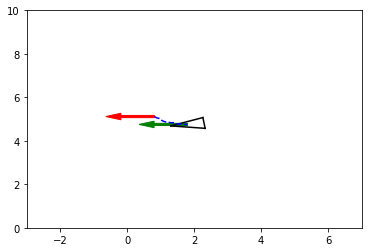

1.5691423390929875


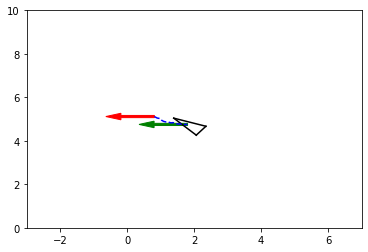

-1.5690499235236817


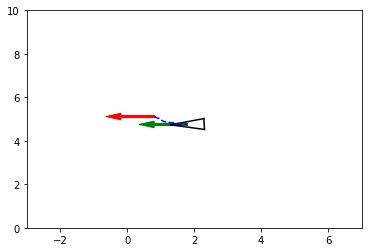

1.5686189879762586


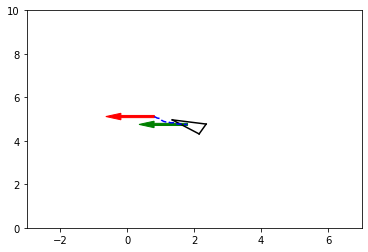

-1.5694141692591153


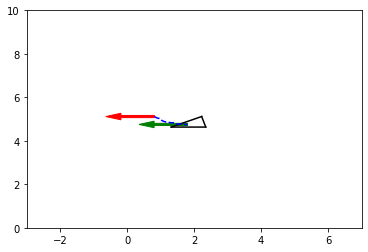

1.5688707895356488


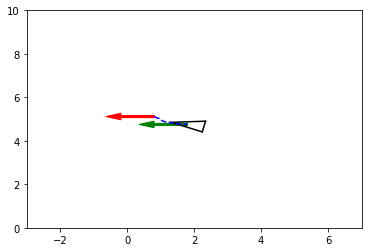

-1.56974075567405


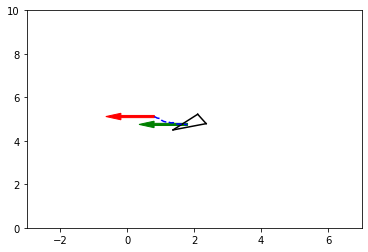

1.5689545667121576


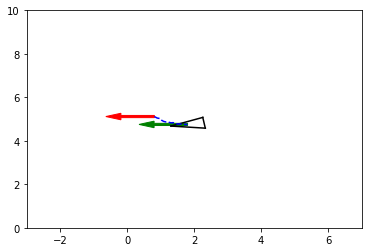

1.5694051968540998


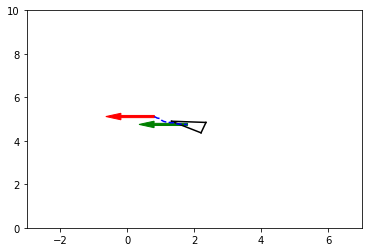

-1.5699951660008102


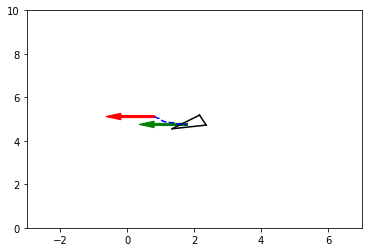

1.56950569701236


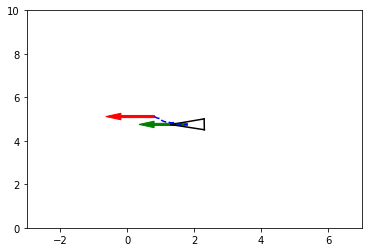

-1.570201971352693


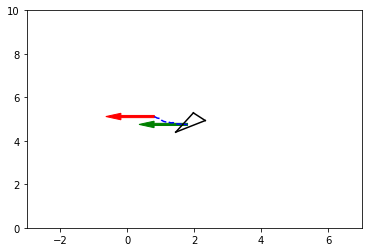

1.5701014099982997


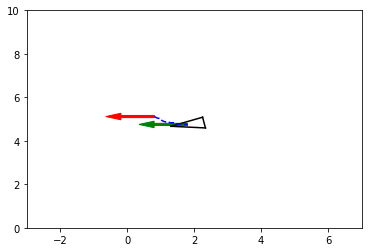

1.570269745320655


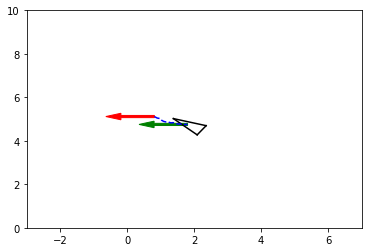

-1.5698098353791017


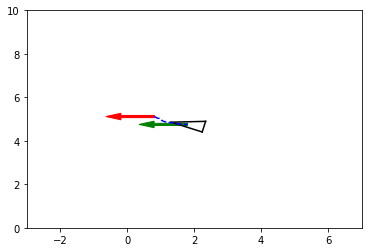

-1.5703640106623544


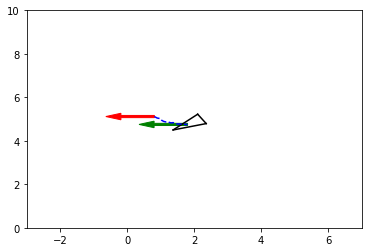

1.5703594732680195


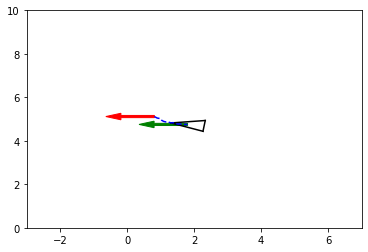

-1.5702117335404804


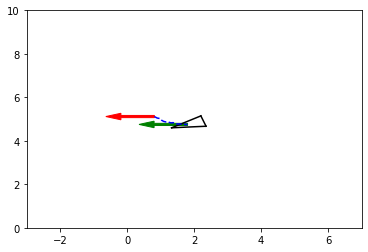

1.570458589457668


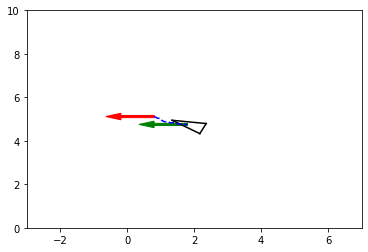

-1.5702550702413989


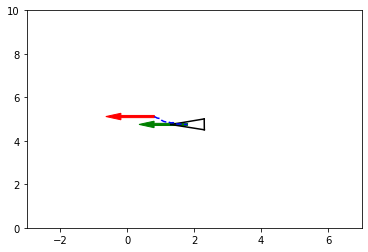

1.5705455600921325


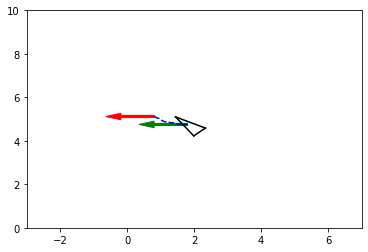

-1.5705053994323028


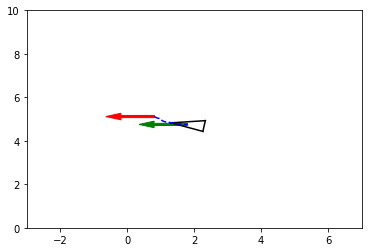

-1.5705761087970118


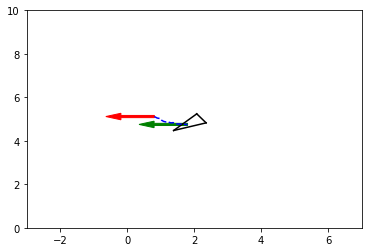

1.5703755853018824


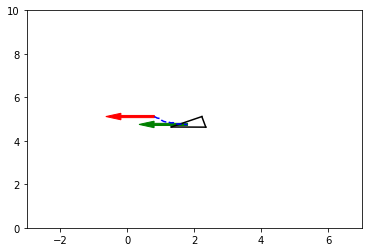

1.570612640467385


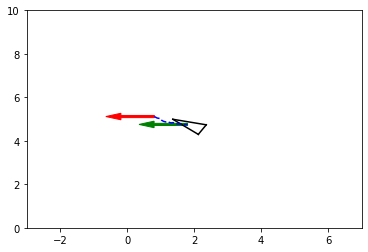

-1.5706151477537063


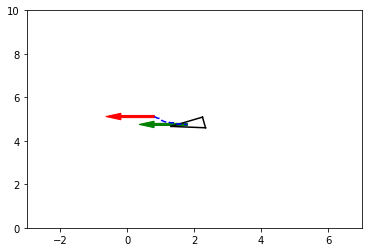

1.5705437927024233


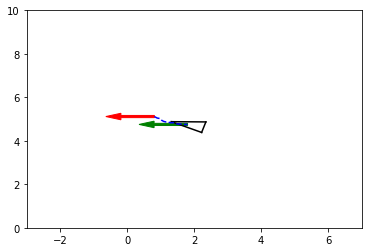

-1.5706578303019159


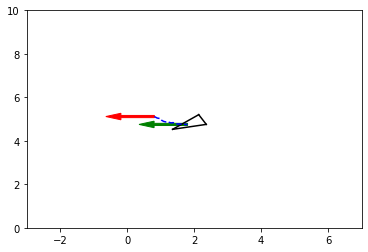

1.5705552589857306


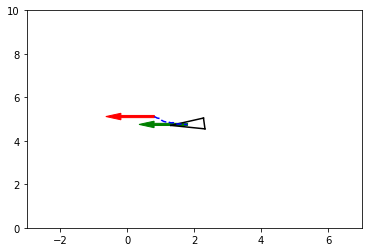

1.5706891287059468


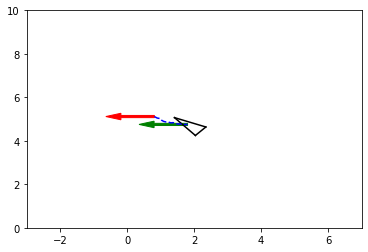

-1.5706772347122708


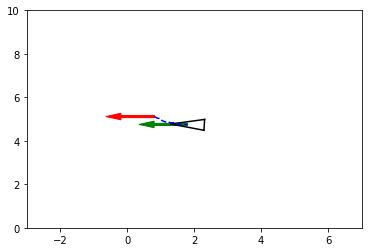

-1.5707066400684544


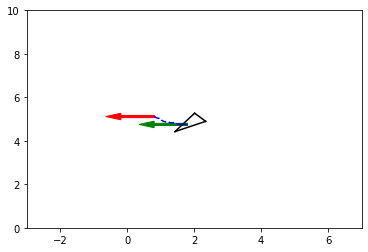

1.5706042740878388


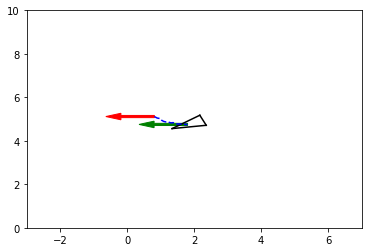

1.5707143050304029


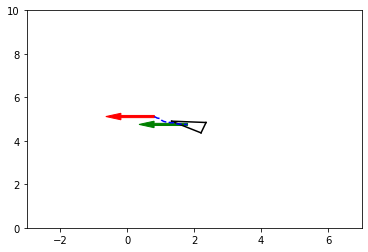

-1.5706713213058217


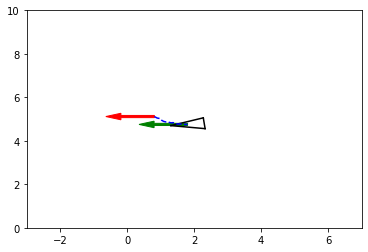

1.5707348885379826


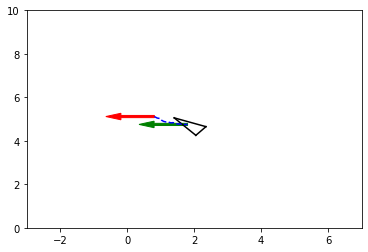

-1.5707300119793999


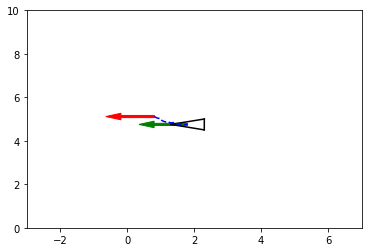

-1.5707465124852724


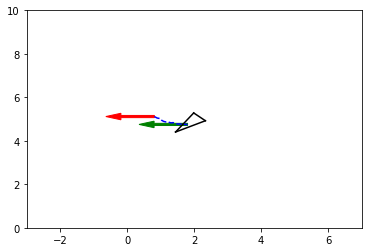

1.5707389825165965


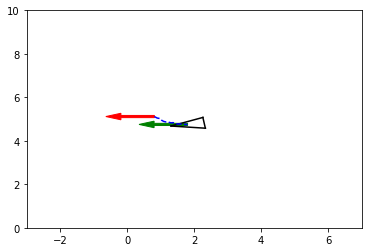

1.5707529540144443


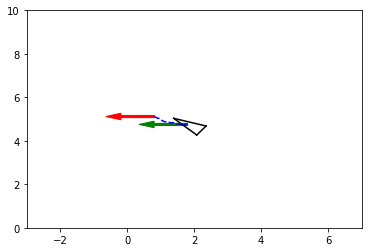

-1.570751816551905


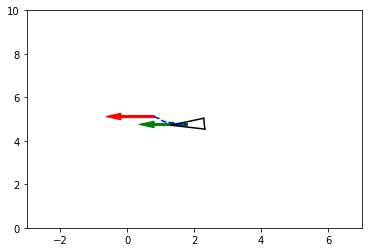

1.5707382605838869


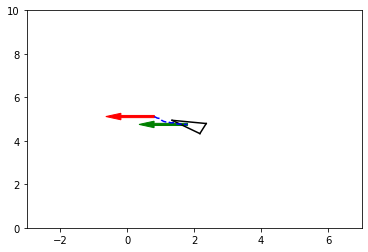

-1.5707616168333083


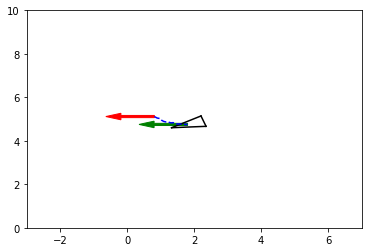

1.570743557188342


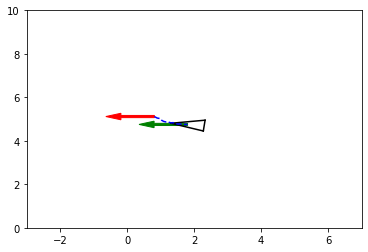

-1.5707703167333504


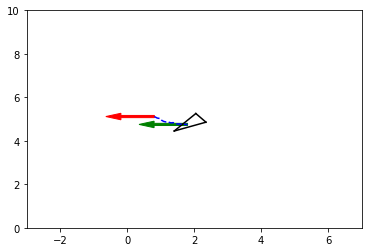

1.5707683432970707


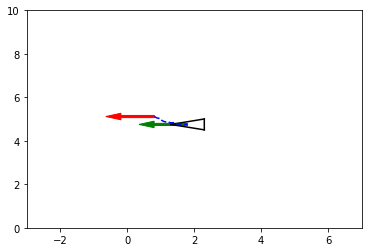

1.5707753109088616


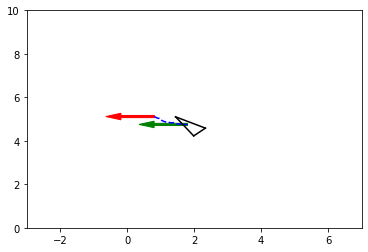

-1.5707719937418565


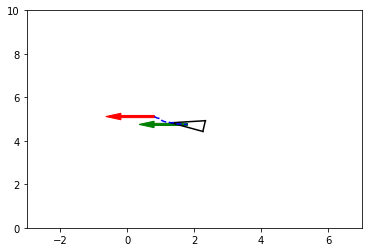

-1.5707779108482662


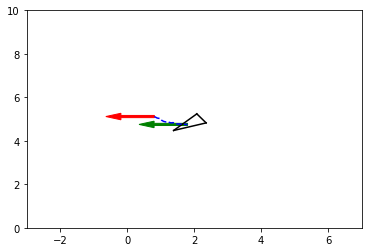

1.5707609719264328


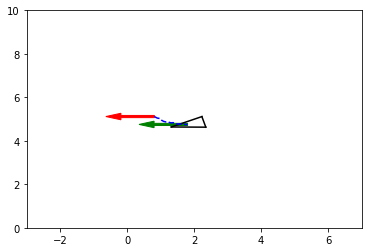

1.5707809080318929


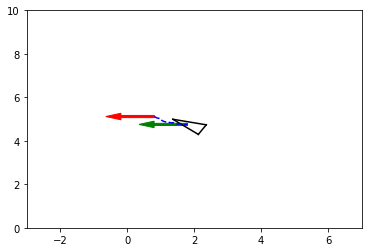

-1.5707812030446742


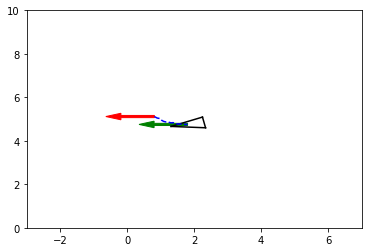

1.570775045372288


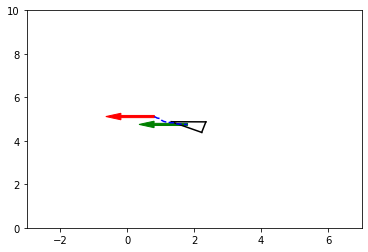

-1.5707847923979106


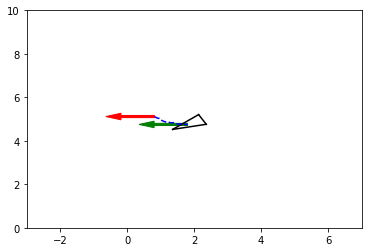

1.570785220020307


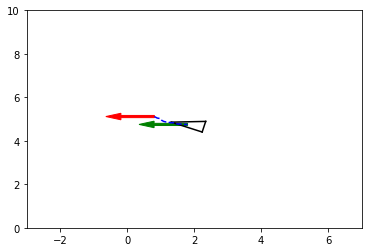

-1.5707870321540494


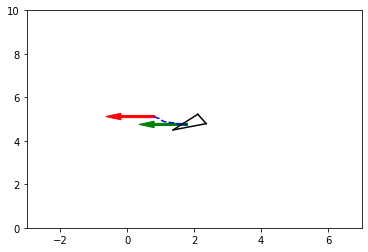

1.5707869040743454


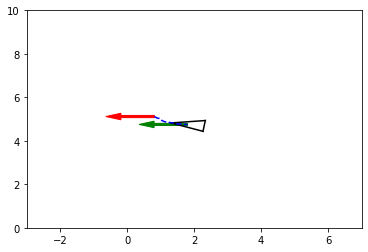

-1.5707837843911459


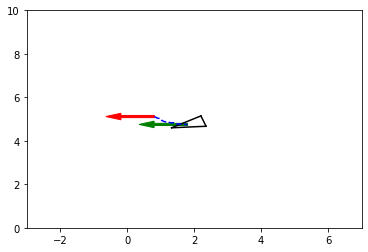

1.5707890318342386


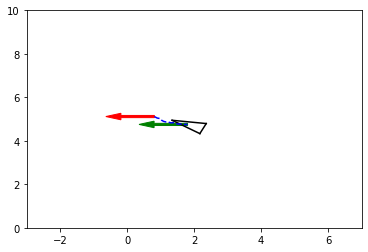

-1.570784754281393


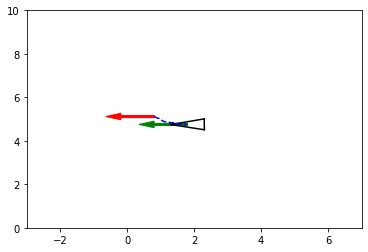

1.5707909022512077


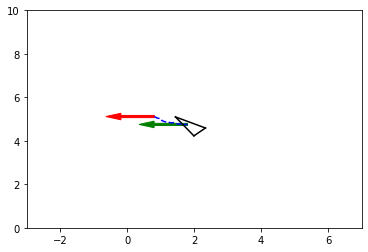

-1.5707901202472396


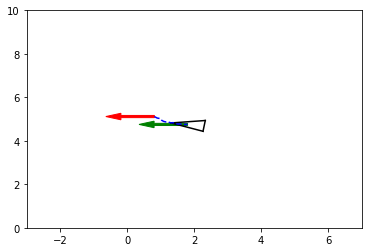

-1.5707916358747958


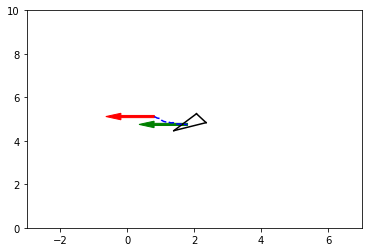

1.5707914619278456


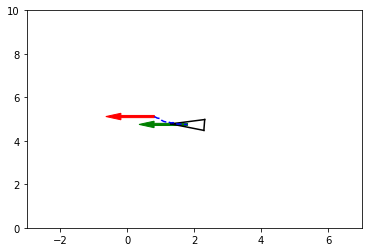

-1.5707900868610962


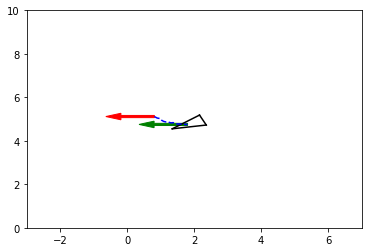

1.5707925120821584


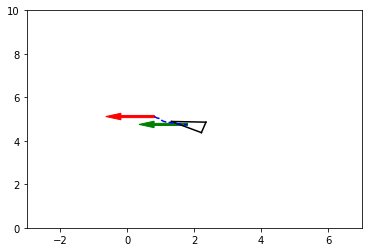

-1.570790717174266


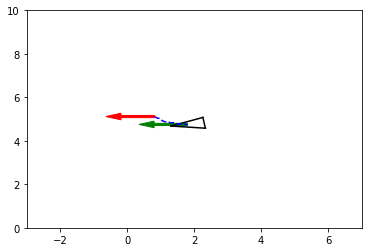

1.5707934490553908


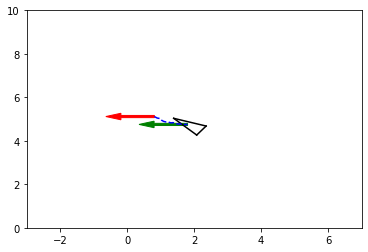

-1.5707933724551635


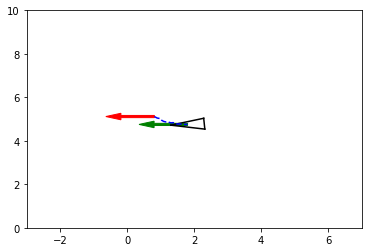

1.5707924750795375


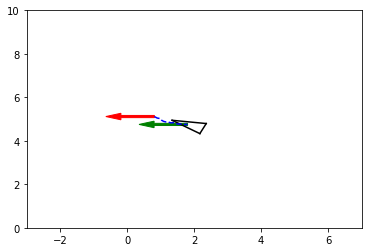

-1.5707940224638068


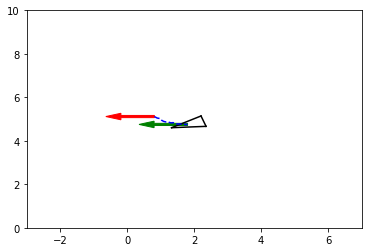

1.570792827890325


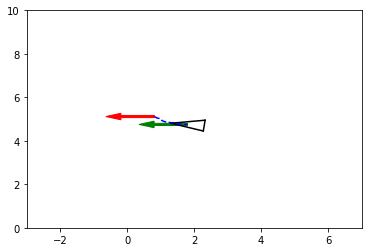

-1.57079459961907


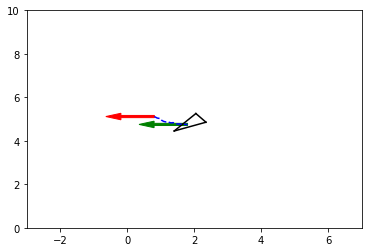

1.5707944718664992


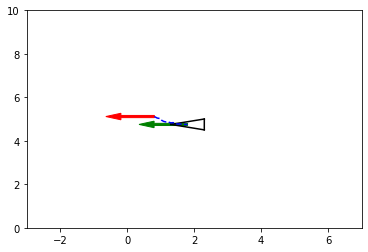

1.5707949339265763


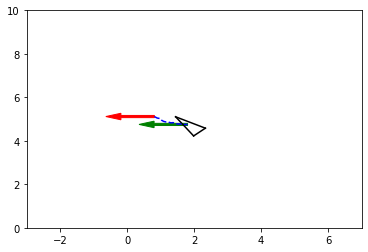

-1.5707947088223684


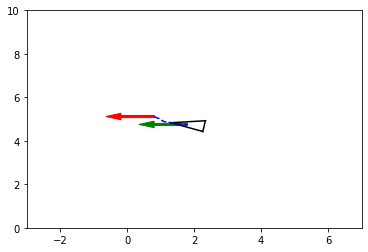

-1.5707951017899484


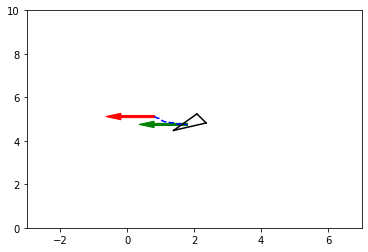

1.5707939941458344


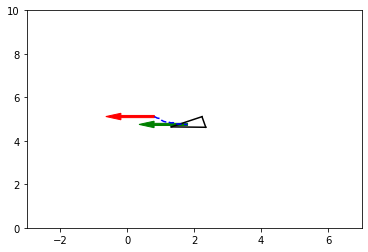

1.570795307829108


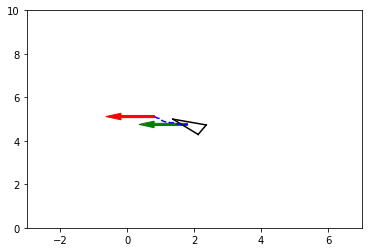

-1.5707953174830391


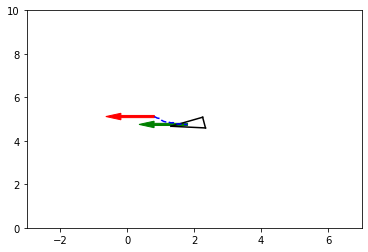

1.570794930132558


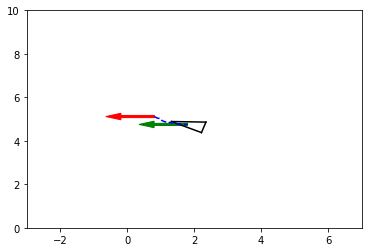

-1.5707955537200475


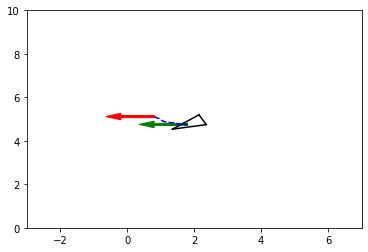

1.5707950013017689


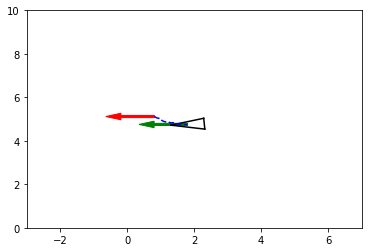

1.5707957355392057


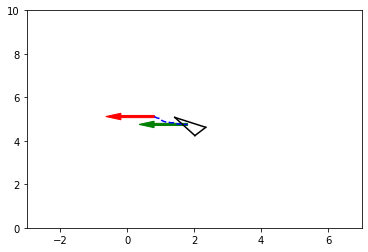

-1.5707956565358225


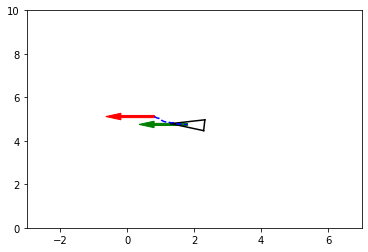

-1.570795820973565


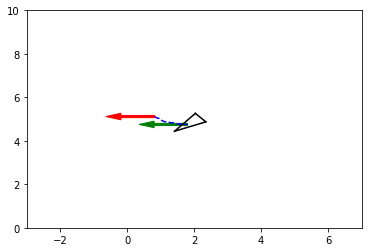

1.570795300298028


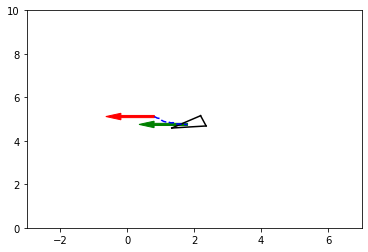

1.5707958837305707


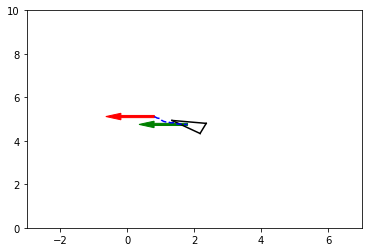

-1.570795919846903


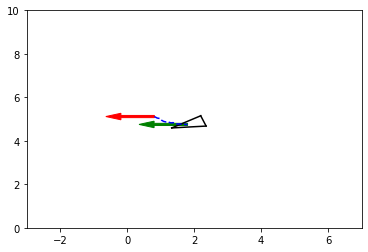

1.5707959646007061


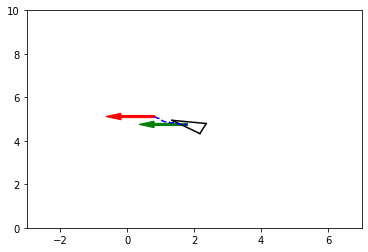

In [51]:
if __name__ == '__main__':
    main()

In [26]:
x1 = 1.547
y1 = 4.787
x2 = 1.801
y2 = 4.754

In [27]:
yaw = math.atan2(y2-y1,x2-x1)
print(yaw)

-0.12919757170480933


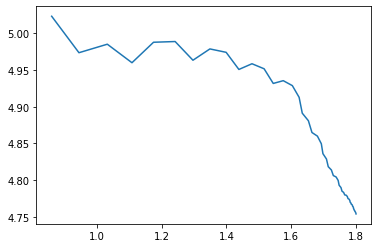

In [47]:
plt.plot(traj_x, traj_y)